### Task 1.1: Compute the sparsity of User X Item matrix

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

CSV_PATH = '../Dataset/ratings_Electronics_50.csv'

# generate user_list and item_list
user_list = {}
item_list = {}
user_cnt = 0
item_cnt = 0
with open (CSV_PATH, 'r') as f:
    for line in f:
        user, item, rating, timestamp = line.split(",")
        if (user not in user_list):
            user_list[user] = user_cnt
            user_cnt = user_cnt + 1
        if (item not in item_list):
            item_list[item] = item_cnt
            item_cnt = item_cnt + 1
print("User count: {}".format(user_cnt))
print("Item count: {}".format(item_cnt))

# generate user-item sparse matrix
users = []
items = []
ratings = []
with open (CSV_PATH, 'r') as f:
    for line in f:
        user, item, rating, timestamp = line.split(",")
        users.append(user_list[user])
        items.append(item_list[item])
        ratings.append(float(rating))

user_item_matrix = csr_matrix((ratings, (users, items)), dtype=float)
sparsity = 1 - user_item_matrix.count_nonzero()/len(user_list)/len(item_list)
print("Sparsity of User-Item matrix: {:2.2f}%".format(sparsity*100))

User count: 1540
Item count: 48190
Sparsity of User-Item matrix: 99.83%


### Task 1.2: The rating histogram with respect to items

In [2]:
import matplotlib.pyplot as plt

#users, items, ratings =scipy.sparse.find(user_item_matrix)

# item_rating_cnts: (num_items x 1) array
# item_rating_cnts[i] indicates how many ratings the i-th item has received
item_rating_cnts = np.bincount(items)
item_hist = np.sort(item_rating_cnts)[::-1]
plt.plot(item_hist)
plt.xlabel("Item")
plt.ylabel("Number of Ratings")

Text(0,0.5,'Number of Ratings')

### Task1.3: The rating histogram with respect to users

Text(0,0.5,'Number of Ratings')

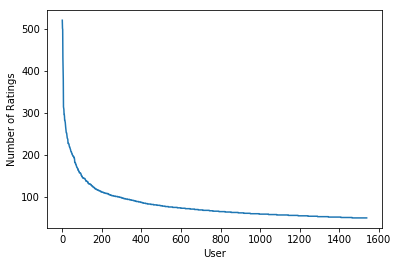

In [3]:
# user_rating_cnts: (num_users x 1) array
# user_rating_cnts[i] indicates how many ratings the i-th user has given
user_rating_cnts = np.bincount(users)
user_hist = np.sort(user_rating_cnts)[::-1]
plt.plot(user_hist)
plt.xlabel("User")
plt.ylabel("Number of Ratings")

### Task 1.4: Rating statistics per user and per item

#### 1.4.1 User rating statistics

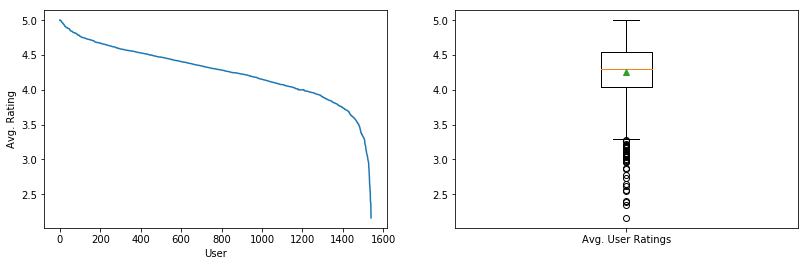

In [4]:
# For each user, compute its average rating
# user_rating_means: (num_users x 1) array
# user_rating_means[i] indicates the avg. rating the i-th user has given
user_rating_means = np.bincount(users, weights=ratings) / user_rating_cnts
plt.figure(figsize=(13.5, 4))
plt.subplot(1, 2, 1)
plt.plot(np.sort(user_rating_means)[::-1])
plt.xlabel("User")
plt.ylabel("Avg. Rating")

# Boxplot of each user's avg. rating
plt.subplot(1, 2, 2)
plt.boxplot([user_rating_means], labels=["Avg. User Ratings"], showmeans=True)
plt.show()

#### 1.4.2 Item rating statistics

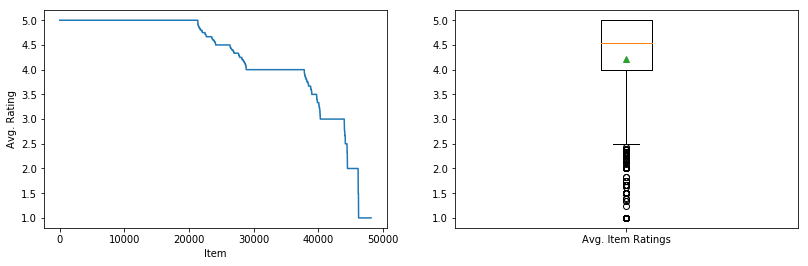

In [5]:
# For each item, compute its average rating
# item_rating_means: (num_items x 1) array
# item_rating_means[i] indicates the avg. rating the i-th user has received
item_rating_means = np.bincount(items, weights=ratings) / item_rating_cnts
plt.figure(figsize=(13.5, 4))
plt.subplot(1, 2, 1)
plt.plot(np.sort(item_rating_means)[::-1])
plt.xlabel("Item")
plt.ylabel("Avg. Rating")

# Boxplot of each user's avg. rating
plt.subplot(1, 2, 2)
plt.boxplot([item_rating_means], labels=["Avg. Item Ratings"], showmeans=True)
plt.show()

### Task 1.5: Analysis of users' rating preference

Text(0,0.5,'Number of ratings')

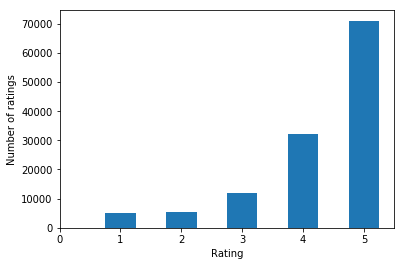

In [6]:
plt.hist(ratings, range=(0.5, 5.5), align='left')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')